In [47]:
#Import Time, Datetime, MatPlotLib, Seaborn, Pandas, Numpy
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [48]:
#For visualizing the data, I will use Seaborn instead of MatPlotLib - because Seaborn requires less code.

#Here are some key questions I'm trying to answer with this analysis:

#1. What was 'typical' travel like each month in 2019 and 2020?  
        #This is the story of the change in Travel (see NPR re: percent change).

#2. What were the COVID stats in 2020 for those same date ranges?  
        #this is the story of COVID trends in those same date ranges.

#4. What was the correlation between COVID status in early (March/April), mid(May -July), 
    #and late (Aug - Oct) 'first wave' of COVID and TSA travel in 2020?
    #(I'm expecting a close correlation in early period, less correlation in mid/late period)

#Note: the longer term plan is to continue to follow the trend through the end of 2020, 
         #as the COVID second wave plays out this Fall/Winter.
    
###WHAT is my one big take-away?  The one big thing to focus on now?  It can be different later (I can grow my tree).#####

In [49]:
#Import the COVID DataFrame created and saved as .csv in the 'COVID19Travel_Create_DataFrames' notebook

covid_travel = pd.read_csv('covid_travel.csv')

#I've intentionally saved the COVID DataFrame as a .csv and opened it here
    #because I need it to have a standard index, rather than having the dates as the index
    #this is because the dates need to be their own column in order to include them in the charts

In [72]:
#Preview the DataFrame

covid_travel.tail(25)

,Unnamed: 0,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count
174,2020-08-22,27995,288,1086,625822.0,2039233.0
175,2020-08-23,17040,199,824,841806.0,2493162.0
176,2020-08-24,49949,794,2562,726788.0,2358007.0
177,2020-08-25,21681,234,996,523186.0,2015088.0
178,2020-08-26,29289,460,1463,540043.0,2188688.0
179,2020-08-27,39368,571,1752,721060.0,2561109.0
180,2020-08-28,22425,221,877,738873.0,2658558.0
181,2020-08-29,18227,175,727,591734.0,1954902.0
182,2020-08-30,17680,174,636,807695.0,1887845.0
183,2020-08-31,27595,306,1348,711178.0,2278159.0


In [51]:
#Check the datatypes
covid_travel.info()

#The dates column can be renamed and the values re-converted to date datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           199 non-null    object 
 1   Cases                199 non-null    int64  
 2   Deaths               199 non-null    int64  
 3   Hospitalizations     199 non-null    int64  
 4   2020 Traveler Count  199 non-null    float64
 5   2019 Traveler Count  199 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [52]:
#Rename the dates column, from 'Unnamed'

covid_df = covid_travel.rename(columns = {"Unnamed: 0": "Date"})
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [53]:
#Import the datetime module
import datetime

#Convert the dates in the date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#Check the datatype for each column - the Date column is now datetime
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 199 non-null    datetime64[ns]
 1   Cases                199 non-null    int64         
 2   Deaths               199 non-null    int64         
 3   Hospitalizations     199 non-null    int64         
 4   2020 Traveler Count  199 non-null    float64       
 5   2019 Traveler Count  199 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 9.5 KB


In [54]:
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [67]:
#I anticipate that I'll want to create some bins to summarize the data by month 
    #But, datetime data-types cannot be binned with pd.cut()
    #Create a month index (number of the month) for each date first and use that for the bins

#Create a month index for each date and list as a separate column
covid_df["Month_Index"] = pd.DatetimeIndex(covid_df["Date"]).month
 
#Create bins using pd.cut() on the new "Month" column and append them to the DataFrame
month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
month_labels = ["Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec", "Jan"]
covid_df["Month"] = pd.cut(covid_df["Month_Index"], month_bins, labels=month_labels)

covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count,Month_Index,Month
0,2020-03-01,233,12,71,2280522.0,2301439.0,3,Mar
1,2020-03-02,161,14,46,2089641.0,2257920.0,3,Mar
2,2020-03-03,224,11,59,1736393.0,1979558.0,3,Mar
3,2020-03-04,217,15,67,1877401.0,2143619.0,3,Mar
4,2020-03-05,253,9,73,2130015.0,2402692.0,3,Mar


In [59]:
travelers = pd.DataFrame(covid_df[["Month", "2020 Traveler Count", "2019 Traveler Count"]])
travelers.head()

,Month,2020 Traveler Count,2019 Traveler Count
0,Mar,2280522.0,2301439.0
1,Mar,2089641.0,2257920.0
2,Mar,1736393.0,1979558.0
3,Mar,1877401.0,2143619.0
4,Mar,2130015.0,2402692.0


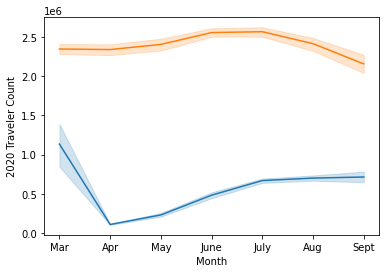

In [65]:
#What did 2019 and 2020 Airline Travel count look like?
####go back and add Jan and Feb back####
sns.lineplot(x="Month", y="2020 Traveler Count", data=travelers)
sns.lineplot(x="Month", y="2019 Traveler Count", data=travelers)
plt.show()

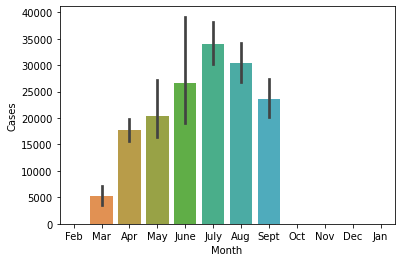

In [71]:
#What were the COVID stats in 2020 for those same date ranges?  
        #this is the story of COVID trends in those same date ranges.
sns.barplot(x="Month", y="Cases", data=covid_df)
plt.show()
#consider sideways bar chart

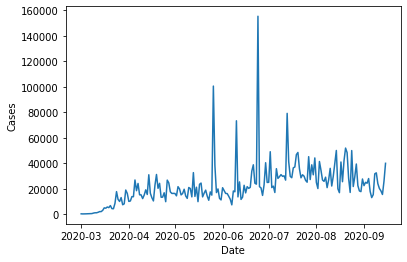

In [79]:
sns.lineplot(x="Date", y="Cases", data=covid_df)
plt.show()
#This is where I can add Deaths and Hospitalizations as well - perhaps as separate plots or maybe as same plot
#Don't forget to add your key!

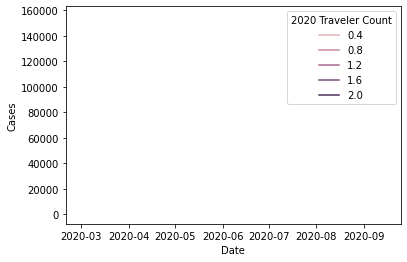

In [86]:
sns.lineplot(x="Date", y="Cases", hue="2020 Traveler Count", data=covid_df)
plt.show()

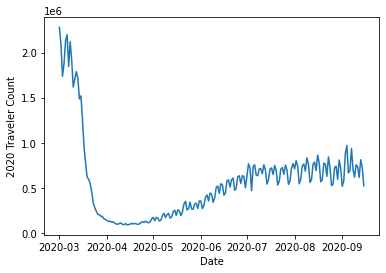

In [81]:
sns.lineplot(x="Date", y="2020 Traveler Count", data=covid_df)
plt.show()
#Travel didn't spike and drop in comparison with COVID cases
#Add this plot on top of the prior plot

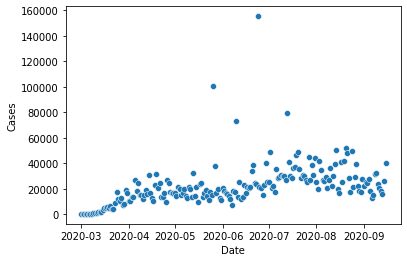

In [82]:
sns.scatterplot(x="Date", y="Cases", data=covid_df)
plt.show()

In [ ]:
#Things to consider - chart the data in one plot area (side-by-side or one-on-top).
#You can tell the before/after stories (here's what happened early COVID....here's what happened mid-COVID)

In [ ]:
#Now, in order to plot the data - I need for there to be only 1 variable (date) 
    #and rest of the datappoints need to be values (cases, deaths, 2019/2020 traveler counts)

tsa_plots = pd.melt(covid_df, id_vars=['Month'], value_vars=['2020 Traveler Count', '2019 Traveler Count'], var_name='Travelers', value_name='Counts')
tsa_plots

In [ ]:
#What was 'typical' travel like each month in 2019?


sns.scatterplot(data=tsa_plots, x="Month", y="Travelers")
plt.show()

In [ ]:
#Visualization ideas
    #Scatterplots with trend lines
    #bar chart with statistical significance

